<a href="https://colab.research.google.com/github/mar25-iia2-radiographies/01_data_exploration/blob/main/01_data_exploration_Sareh_version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Cell 1 - Upload kaggle.json from your local computer to Colab

from google.colab import files  # import Colab helper to upload files
uploaded = files.upload()       # open a dialog to choose kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
# Cell 2 - Automatically detect the uploaded kaggle.json file

import os
import shutil # High-level file operations (move, copy, delete); used here to relocate kaggle.json securely

# Find ANY file that contains "kaggle" and ends with .json
uploaded_files = [f for f in os.listdir() if f.startswith("kaggle") and f.endswith(".json")]

if len(uploaded_files) == 0:
    raise FileNotFoundError(
        "No kaggle.json file found.\n"
        "Please go back to **Cell 1**, run it, and upload your kaggle.json file."
    )

kaggle_file = uploaded_files[0]  # pick the first match
print("Detected Kaggle file:", kaggle_file)

# Create .kaggle directory if missing
os.makedirs("/root/.kaggle", exist_ok=True)

# Move the detected file to the correct location
shutil.move(kaggle_file, "/root/.kaggle/kaggle.json")

# set permissions using octal format (0o600 = read/write for owner only)
os.chmod("/root/.kaggle/kaggle.json", 0o600)

print("Kaggle API key installed successfully.")

Detected Kaggle file: kaggle.json
Kaggle API key installed successfully.


In [3]:
# Cell 3 - Download Kaggle Dataset (COVID-19 Radiography Database)

# Create a directory to store the dataset
# We use -p so the command doesn't fail if the folder already exists
!mkdir -p data/covid_radiography

# Download the dataset from Kaggle using the Kaggle API
# -d : dataset identifier on Kaggle
# -p : path where the zip file will be saved
!kaggle datasets download -d tawsifurrahman/covid19-radiography-database -p data/covid_radiography

# Unzip the downloaded file
import zipfile
import os

# Automatically detect ZIP file
zip_files = [f for f in os.listdir("data/covid_radiography") if f.endswith(".zip")]

if len(zip_files) == 0:
    raise FileNotFoundError("No ZIP file found in data/covid_radiography")

zip_path = os.path.join("data/covid_radiography", zip_files[0])
print("Detected ZIP file:", zip_path)

# Extract all files into the target directory
# "with" opens the ZIP file safely (auto-closes it), "r" means read-only mode,
# zip_ref is the temporary reference (handle) for the opened ZIP file,
# and extractall() unpacks ALL content of the ZIP into the specified folder.
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall("data/covid_radiography")

print("Extraction completed.")

# Automatically detect the dataset's main folder (the unzipped folder)
extracted_folders = [
    f for f in os.listdir("data/covid_radiography")
    if os.path.isdir(os.path.join("data/covid_radiography", f))
    and not f.endswith(".zip")
]

if len(extracted_folders) == 0:
    raise FileNotFoundError("No extracted dataset folder found inside data/covid_radiography")

main_folder = extracted_folders[0]
main_path = os.path.join("data/covid_radiography", main_folder)

print("Automatically detected main dataset folder:", main_folder)

# List the subfolders inside the dataset (these should be the 4 classes)
print("Subfolders inside the dataset:")
print(os.listdir(main_path))

Dataset URL: https://www.kaggle.com/datasets/tawsifurrahman/covid19-radiography-database
License(s): copyright-authors
 98% 763M/778M [00:04<00:00, 40.3MB/s]
100% 778M/778M [00:04<00:00, 189MB/s] 
Detected ZIP file: data/covid_radiography/covid19-radiography-database.zip
Extraction completed.
Automatically detected main dataset folder: COVID-19_Radiography_Dataset
Subfolders inside the dataset:
['COVID.metadata.xlsx', 'Lung_Opacity.metadata.xlsx', 'Normal', 'README.md.txt', 'Viral Pneumonia.metadata.xlsx', 'Lung_Opacity', 'Normal.metadata.xlsx', 'Viral Pneumonia', 'COVID']


In [4]:
# Cell 4 - Build a *raw* DataFrame

import os
import pandas as pd
from PIL import Image   #  # Provides basic image handling utilities (open images, convert color modes, read pixel values ...)

print("Using dataset folder:", main_path, "\n")


# Detect class folders (COVID, Normal, Lung_Opacity, Viral Pneumonia)
class_folders = [
    f for f in os.listdir(main_path)
    if os.path.isdir(os.path.join(main_path, f))
]

print("Detected class folders:", class_folders , "\n")

rows = []

for cls in class_folders:
    images_dir = os.path.join(main_path, cls, "images")  # we only explore 'images' subfolder

    for fname in os.listdir(images_dir):
        fpath = os.path.join(images_dir, fname)

        # We only skip directories; we keep *all* files, whatever the extension
        if os.path.isfile(fpath):
            root, ext = os.path.splitext(fname)  # ext gives '.png', '.jpg', etc.
             # extract image size (H, W)
            try:
                with Image.open(fpath) as img:
                    width, height = img.size   # PIL returns (W, H)
            except:
                width, height = None, None     # in case corrupted file exists
            rows.append({
                "filepath": fpath,
                "filename": root,
                "ext": ext.lower(),  # for easier analysis
                "label": cls,
                "width": width,
                "height": height
            })

df_images_raw = pd.DataFrame(rows)
df_images_raw.info()
df_images_raw.head()

Using dataset folder: data/covid_radiography/COVID-19_Radiography_Dataset 

Detected class folders: ['Normal', 'Lung_Opacity', 'Viral Pneumonia', 'COVID'] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21165 entries, 0 to 21164
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filepath  21165 non-null  object
 1   filename  21165 non-null  object
 2   ext       21165 non-null  object
 3   label     21165 non-null  object
 4   width     21165 non-null  int64 
 5   height    21165 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 992.2+ KB


,filepath,filename,ext,label,width,height
0,data/covid_radiography/COVID-19_Radiography_Da...,Normal-4605,.png,Normal,299,299
1,data/covid_radiography/COVID-19_Radiography_Da...,Normal-422,.png,Normal,299,299
2,data/covid_radiography/COVID-19_Radiography_Da...,Normal-5769,.png,Normal,299,299
3,data/covid_radiography/COVID-19_Radiography_Da...,Normal-4704,.png,Normal,299,299
4,data/covid_radiography/COVID-19_Radiography_Da...,Normal-721,.png,Normal,299,299


In [12]:
# Authenticate your Google account to enable Google Sheets integration in Colab
from google.colab import auth
auth.authenticate_user()
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df_images_raw)

https://docs.google.com/spreadsheets/d/1wgdaSqEIdl5KkvBJw5iMeVTvGxRtP9mNjbUquxP_uxs/edit#gid=0


Total number of images: 21165 

Number of images and percentage per class:

                 n_images    percent
label                               
Normal              10192  48.154973
Lung_Opacity         6012  28.405386
COVID                3616  17.084810
Viral Pneumonia      1345   6.354831


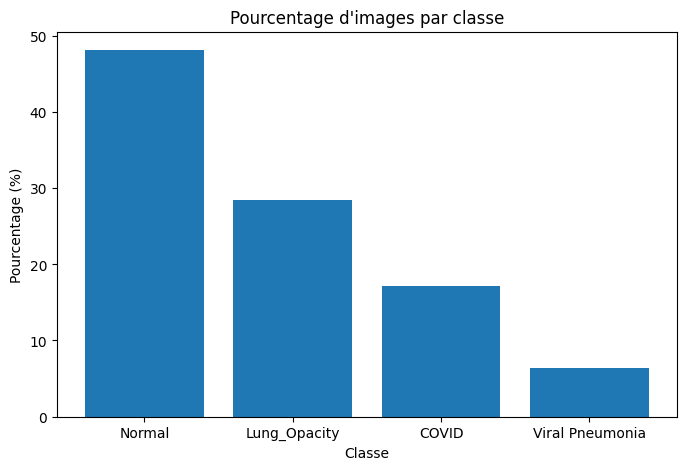

In [8]:
# Cell 5 — Basic statistics: number and percentage of images per class with visualization

import matplotlib.pyplot as plt

# Count number of images per class
class_counts = df_images_raw["label"].value_counts()

# Total number of images
total_images = len(df_images_raw)

# Build a small summary DataFrame
df_class_stats = pd.DataFrame({
    "n_images": class_counts,
    "percent": (class_counts / total_images) * 100
})

print("Total number of images:", total_images, "\n")
print("Number of images and percentage per class:\n")
print(df_class_stats)


# Simple bar plot of class percentages

percentages = df_class_stats["percent"]

plt.figure(figsize=(8, 5))
plt.bar(percentages.index, percentages.values)

plt.title("Pourcentage d'images par classe")
plt.xlabel("Classe")
plt.ylabel("Pourcentage (%)")

plt.show()

        height    width
count  21165.0  21165.0
mean     299.0    299.0
std        0.0      0.0
min      299.0    299.0
25%      299.0    299.0
50%      299.0    299.0
75%      299.0    299.0
max      299.0    299.0


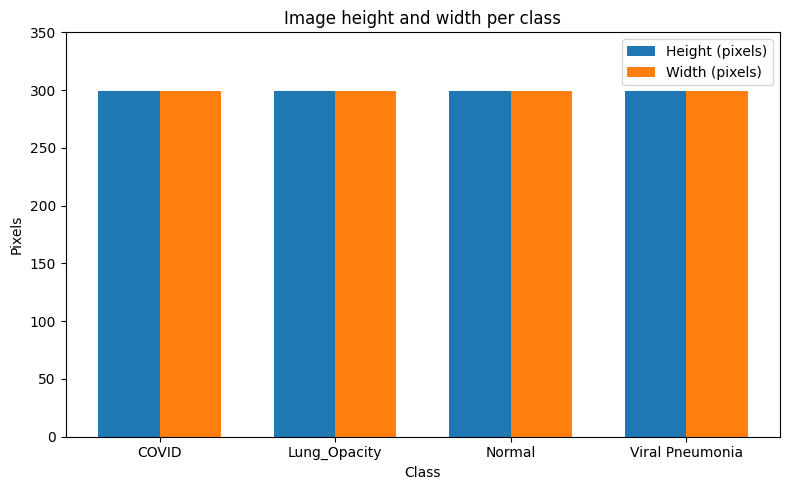

In [9]:
# Cell 6 - Basic statistics of image sizes

print(df_images_raw[["height","width"]].describe())

# Bar plot: height and width per class

import matplotlib.pyplot as plt
import numpy as np

# 1) Compute average height and width per class (here they are all 299, but we do it cleanly)
class_sizes = df_images_raw.groupby("label")[["height", "width"]].mean()
classes = class_sizes.index.tolist()          # list of class names
heights = class_sizes["height"]      # height values (pixels)
widths  = class_sizes["width"]       # width values (pixels)

x = np.arange(len(classes))          # x positions for the 4 classes
bar_width = 0.35                     # width of each bar

plt.figure(figsize=(8, 5))

# Bar for height
plt.bar(x - bar_width/2, heights, width=bar_width, label="Height (pixels)")

# Bar for width
plt.bar(x + bar_width/2, widths, width=bar_width, label="Width (pixels)")

# Axis labels and title
plt.xlabel("Class")                           # X-axis: class names
plt.ylabel("Pixels")                          # Y-axis: pixel value (e.g., 299)
plt.title("Image height and width per class") # Figure title

# Put class names under the ticks
plt.xticks(x, classes)

# Small margin on top of bars
plt.ylim(0, 350)

plt.legend()
plt.tight_layout()
plt.show()

In [10]:
# Cell 7 - Répartition des extensions

print("Répartition des extensions :")
df_images_raw["ext"].value_counts()

Répartition des extensions :


,count
ext,
.png,21165


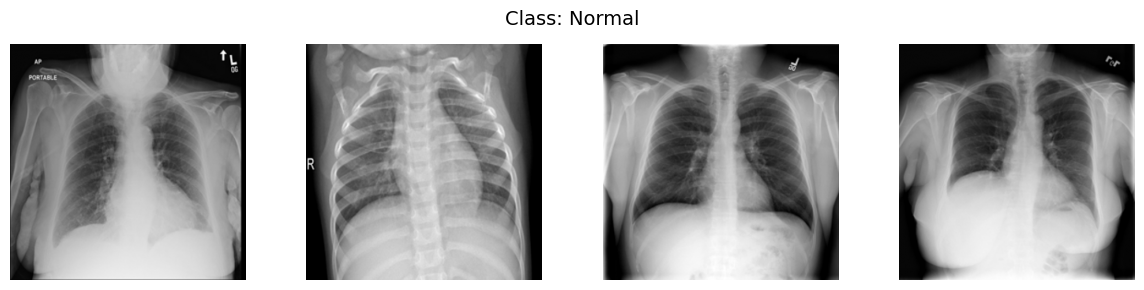

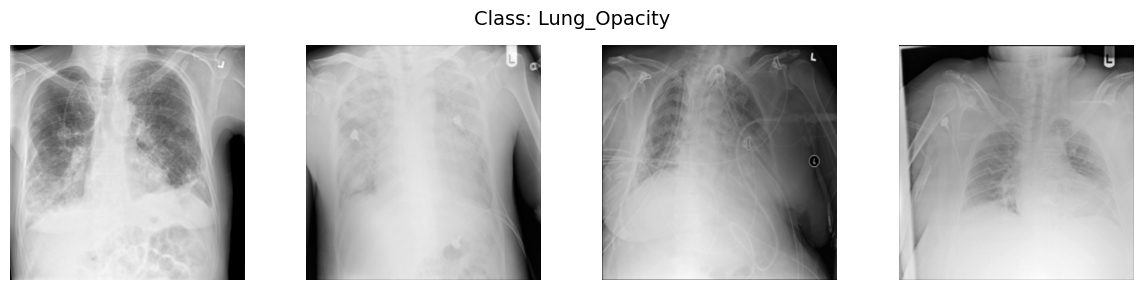

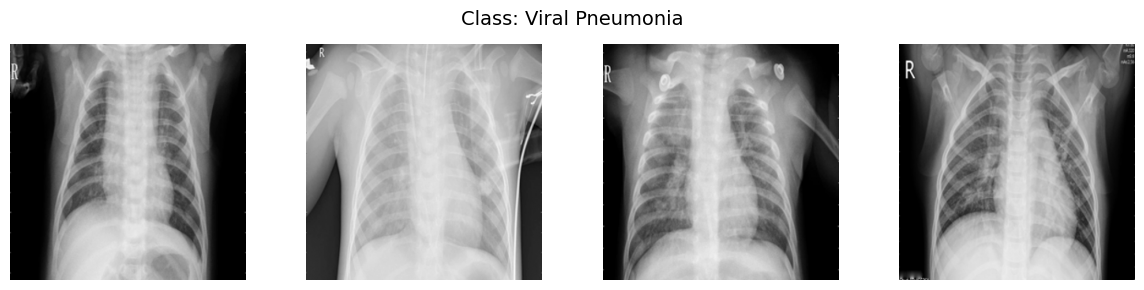

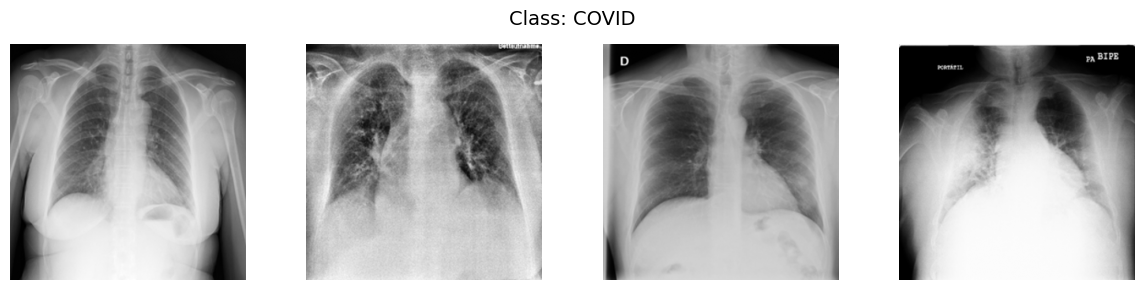

In [11]:
# Cell 8 — Simple visualization: show the first 4 images from each class
# This cell displays 4 sample X-ray images per class in clean grayscale,
# with titles placed just above the images (small vertical gap).

import matplotlib.pyplot as plt
from PIL import Image  # Provides basic image handling utilities (open images, convert color modes, read pixel values...)
import numpy as np

for cls in df_images_raw["label"].unique():
    # Select the first 4 images of this class
    subset = df_images_raw[df_images_raw["label"] == cls].head(4)

    # Create a horizontal figure for this class
    fig = plt.figure(figsize=(12, 3))

    # Title placed close to the top of the images
    fig.suptitle(f"Class: {cls}", fontsize=14, y=0.95)  # y controls vertical position of title

    # Loop over the 4 selected rows
    # enumerate(...) gives (index, row)
    # subset.itertuples() returns each DataFrame row as a lightweight Python object,
    # allowing access like: row.filepath, row.label, etc.
    for i, row in enumerate(subset.itertuples(), 1):
        img = Image.open(row.filepath)   # Read image with PIL, Image.open() returns a PIL Image object (NOT a NumPy array)
        img_array = np.array(img)        # Convert PIL image to NumPy array for imshow()

        # Create a subplot inside the figure.
        # add_subplot(1, 4, i) means:
        # - 1 row of subplots
        # - 4 columns of subplots
        # - place this image in position i (1 to 4).
        # Returns an Axes object ('ax') that represents one subplot area.
        ax = fig.add_subplot(1, 4, i)
        ax.imshow(img, cmap="gray")            # Display the image, True grayscale display
        ax.axis("off")                         # No axes for a cleaner view

    # Automatically adjusts spacing between subplots to remove unnecessary gaps
    # and prevent titles / images / axes from overlapping. Makes the layout clean.
    fig.tight_layout()              #reduces padding inside the figure

    plt.show()

In [14]:
# Cell 9 - Compute mean pixel intensity for each image (grayscale)
# and store it in a clean DataFrame for further analysis (e.g. boxplot)

import numpy as np
import pandas as pd
from PIL import Image  # Provides basic image handling utilities (open images, convert color modes, read pixel values...)

# --- Step 1: Define a safe function to compute mean pixel intensity ---
def compute_mean_intensity(image_path: str) -> float:
    """
    Compute the mean pixel intensity of an X-ray image.
    The image is converted to grayscale (0–255) before computation.
    """
    try:
        img = Image.open(image_path).convert("L")  # Open the image file and Convert the image to grayscale (L = luminance / intensity only)
        arr = np.array(img, dtype=np.float32)      # Convert the PIL Image object into a NumPy array of pixel values, dtype=float32 is used to allow precise numerical computations
        return float(arr.mean())  # Compute and return the mean value of all pixel intensities
    except Exception:
        return np.nan # Return NaN to mark a numeric value as missing when the image cannot be processed

# --- Step 2: Create a new DataFrame with filepath and label only ---
df_intensity = df_images_raw[["filepath", "label"]].copy() # Create an independent copy to safely add new columns without modifying the original DataFrame

# --- Step 3: Compute mean pixel intensity for each image ---
df_intensity["mean_intensity"] = df_intensity["filepath"].apply(compute_mean_intensity)

# --- Step 4: Remove images with failed computation (NaN) ---
df_intensity_clean = (
    df_intensity
    .dropna(subset=["mean_intensity"])
    .reset_index(drop=True)
)

# --- Step 5: Sanity checks ---
print("Total number of images (raw):", len(df_images_raw))
print("Images with valid mean intensity:", len(df_intensity_clean))

print("\nOverall mean pixel intensity statistics:")
print(df_intensity_clean["mean_intensity"].describe())

print("\nMean pixel intensity statistics by class:")
print(df_intensity_clean.groupby("label")["mean_intensity"].describe())


Total number of images (raw): 21165
Images with valid mean intensity: 21165

Overall mean pixel intensity statistics:
count    21165.000000
mean       129.908506
std         23.491756
min         25.511381
25%        113.313187
50%        127.133888
75%        146.682907
max        229.141693
Name: mean_intensity, dtype: float64

Mean pixel intensity statistics by class:
                   count        mean        std        min         25%  \
label                                                                    
COVID             3616.0  139.521210  25.029784  25.511381  126.883097   
Lung_Opacity      6012.0  126.021596  23.570601  32.226898  110.578640   
Normal           10192.0  129.389800  22.448670  26.443596  113.520590   
Viral Pneumonia   1345.0  125.369630  18.980974  64.772697  113.497879   

                        50%         75%         max  
label                                                
COVID            142.594757  155.970734  216.561844  
Lung_Opacity     12

<Figure size 1000x500 with 0 Axes>

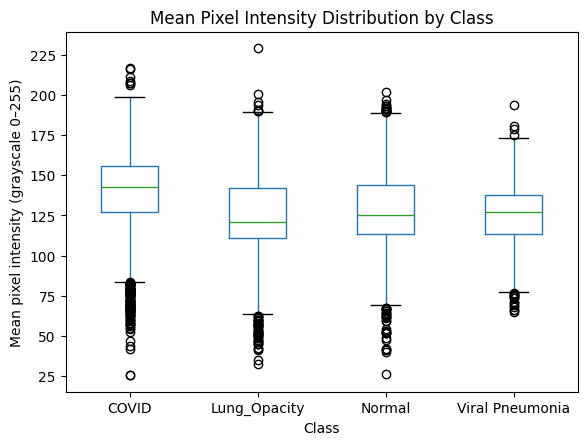

In [26]:
# Cell 10 - Boxplot of mean pixel intensity per class
# This plot compares the distribution of mean pixel intensities across the 4 classes.

import matplotlib.pyplot as plt

# Create the boxplot grouped by class label
plt.figure(figsize=(10, 5))
df_intensity_clean.boxplot(column="mean_intensity", by="label")

# Improve readability
plt.title("Mean Pixel Intensity Distribution by Class")
plt.suptitle("")  # Removes the automatic pandas subtitle "mean_intensity by label"
plt.xlabel("Class")
plt.ylabel("Mean pixel intensity (grayscale 0–255)")
plt.xticks()
plt.grid(False)
plt.show()
